## Inspecting and cleaning the datasets

First, let's take a look at the data that we have been provided

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the 'Working Days' file
working_days = pd.ExcelFile('Exercise - Working Days calendar - FOR CANDIDATE-SENT - SHORT.xlsx')

In [3]:
#Taking a look at the sheets we have
working_days.sheet_names

['Weekdays', 'Calendar']

In [4]:
#Creating a dictionary (workingdays_df), that contains a dataframe for every sheet_name
workingdays_df = {sh:working_days.parse(sh) for sh in working_days.sheet_names}

In [5]:
#taking a look at the 'Weekdays'
weekdays = workingdays_df['Weekdays']
weekdays.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Memo: Working Days
2,NaN,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,NaN,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,NaN,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,NaN,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,NaN,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,NaN,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20
8,NaN,2015-06-06 00:00:00,5,5,4,4,4,4,4,30,22
9,NaN,2015-07-07 00:00:00,4,4,5,5,5,4,4,31,23


That is a very messy df. Let's try to clean it a little bit.

In [6]:
#let's take a look at the lenght of the df
len(weekdays)

41

In [7]:
#let's take a look at the info
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
Unnamed: 0     0 non-null float64
Unnamed: 1     39 non-null object
Unnamed: 2     39 non-null object
Unnamed: 3     39 non-null object
Unnamed: 4     39 non-null object
Unnamed: 5     39 non-null object
Unnamed: 6     39 non-null object
Unnamed: 7     39 non-null object
Unnamed: 8     39 non-null object
Unnamed: 9     39 non-null object
Unnamed: 10    40 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ KB


In [8]:
#getting rid of the first column
del weekdays['Unnamed: 0']
weekdays.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Memo: Working Days
2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20


In [9]:
#dropping the first two rows
weekdays = weekdays.iloc[2:]
weekdays.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22


In [10]:
#getting the right headers
new_header = weekdays.iloc[0] 
weekdays = weekdays[1:] 
weekdays.columns = new_header
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [11]:
#finding a more descriptive name for the last column
weekdays = weekdays.rename(columns={'Country 1': 'working_days'})
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [12]:
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 3 to 40
Data columns (total 10 columns):
Month-Year        38 non-null object
#Mon              38 non-null object
#Tue              38 non-null object
#Wed              38 non-null object
#Thu              38 non-null object
#Fri              38 non-null object
#Sat              38 non-null object
#Sun              38 non-null object
Total Weekdays    38 non-null object
working_days      38 non-null object
dtypes: object(10)
memory usage: 3.1+ KB


In [13]:
#let's now convert the numeric values 
weekdays.columns

Index(['Month-Year', '#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days'],
      dtype='object', name=2)

In [14]:
int_columns = ['#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days']
weekdays[int_columns] = weekdays[int_columns].apply(pd.to_numeric, errors='coerce')

In [15]:
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 3 to 40
Data columns (total 10 columns):
Month-Year        38 non-null object
#Mon              38 non-null int64
#Tue              38 non-null int64
#Wed              38 non-null int64
#Thu              38 non-null int64
#Fri              38 non-null int64
#Sat              38 non-null int64
#Sun              38 non-null int64
Total Weekdays    38 non-null int64
working_days      38 non-null int64
dtypes: int64(9), object(1)
memory usage: 3.1+ KB


Taking a look at the second sheet

In [16]:
#taking a look at the second sheet
calendar = workingdays_df['Calendar']

In [17]:
calendar.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Holiday is marked as 0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1
8,Jan2015,2015-01-06 00:00:00,2015-01-06 00:00:00,Tuesday,2015,01,Jan,06,1
9,Jan2015,2015-01-07 00:00:00,2015-01-07 00:00:00,Wednesday,2015,01,Jan,07,1


In [18]:
len(calendar)

1158

In [19]:
#Let's clean this one up aswell
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 9 columns):
Unnamed: 0                1155 non-null object
Unnamed: 1                1156 non-null object
Unnamed: 2                1156 non-null object
Unnamed: 3                1156 non-null object
Unnamed: 4                1156 non-null object
Unnamed: 5                1156 non-null object
Unnamed: 6                1156 non-null object
Unnamed: 7                1156 non-null object
Holiday is marked as 0    1156 non-null object
dtypes: object(9)
memory usage: 81.5+ KB


In [20]:
#dropping the first two rows
calendar = calendar.iloc[2:]
calendar.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Holiday is marked as 0
2,NaN,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0


In [21]:
#getting the right headers
new_header = calendar.iloc[0] 
calendar = calendar[1:] 
calendar.columns = new_header
calendar.head()

2,nan,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1


In [22]:
#finding a more descriptive name for the first and last column
calendar = calendar.rename(columns={calendar.columns[0]: 'str_month_year', 'Country 1': 'Holiday_is_0'})
calendar.head()

2,str_month_year,Date,Month-Year,Day,Year,Month,Month,Day,Holiday_is_0
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1


Moving on to the next file

In [23]:
#reading the daily sales file
daily_sales = pd.read_csv('Exercise - Daily Sales - FOR CANDIDATE-SENT - SHORT.csv')

In [24]:
len(daily_sales)

634

In [25]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 4 columns):
Country         634 non-null object
Posting Date    634 non-null object
Brand           634 non-null object
Daily Sales     634 non-null object
dtypes: object(4)
memory usage: 19.9+ KB


In [26]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales
0,Country 1,02.01.2015,Brand A,"30,785.22"
1,Country 1,05.01.2015,Brand A,"18,256.02"
2,Country 1,06.01.2015,Brand A,"24,168.04"
3,Country 1,07.01.2015,Brand A,"3,858.65"
4,Country 1,12.01.2015,Brand A,"1,229.33"


In [27]:
daily_sales['Daily Sales'] = daily_sales['Daily Sales'].str.replace(',', '').astype(float)

In [28]:
daily_sales.describe()

,Daily Sales
count,634.000000
mean,15933.469432
std,14196.766542
min,-9693.270000
25%,352.012500
50%,15609.850000
75%,25639.130000
max,84258.830000


In [29]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales
0,Country 1,02.01.2015,Brand A,30785.22
1,Country 1,05.01.2015,Brand A,18256.02
2,Country 1,06.01.2015,Brand A,24168.04
3,Country 1,07.01.2015,Brand A,3858.65
4,Country 1,12.01.2015,Brand A,1229.33


In [30]:
lo_actual_long = pd.read_excel('Exercise - ACT and LO Monthly - FOR CANDIDATE-SENT - SHORT.xlsx')

In [31]:
lo_actual_long.head()

,Submission,Year,Month,Country 1 - Brand A
0,Actual,2015,1,224134.6
1,Actual,2015,2,184817.6
2,Actual,2015,3,249555.0
3,Actual,2015,4,245542.0
4,Actual,2015,5,221473.8


In [32]:
lo_actual_long.tail()

,Submission,Year,Month,Country 1 - Brand A
67,LO Oct 17 Total,2017,10,344131.8520
68,LO Nov 17 Total,2017,11,306463.6720
69,LO Dec 17 Total,2017,12,301781.6840
70,LO Jan 18 Total,2018,1,325117.1786
71,LO Feb 18 Total,2018,2,217738.2980


In [33]:
lo_actual_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Submission             72 non-null object
Year                   72 non-null int64
Month                  72 non-null int64
Country 1 - Brand A    72 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [34]:
#changing the format of the df to a wider format
lo_actual_wide = lo_actual_long
lo_actual_wide['Submission_short'] = lo_actual_wide['Submission'].str.split().str[0]

In [35]:
lo_actual_wide.tail()

,Submission,Year,Month,Country 1 - Brand A,Submission_short
67,LO Oct 17 Total,2017,10,344131.8520,LO
68,LO Nov 17 Total,2017,11,306463.6720,LO
69,LO Dec 17 Total,2017,12,301781.6840,LO
70,LO Jan 18 Total,2018,1,325117.1786,LO
71,LO Feb 18 Total,2018,2,217738.2980,LO


In [36]:
lo_actual_wide = lo_actual_wide[['Year', 'Month', 'Country 1 - Brand A', 'Submission_short']]

In [37]:
lo_actual_wide = lo_actual_wide.pivot_table(values='Country 1 - Brand A', index=['Year', 'Month'], columns='Submission_short', aggfunc=np.sum)

In [38]:
lo_actual_wide.reset_index(inplace=True)

In [39]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO
0,2015,1,224134.6,224175.600000
1,2015,2,184817.6,198122.288255
2,2015,3,249555.0,255465.428000
3,2015,4,245542.0,232068.578168
4,2015,5,221473.8,216181.778528


In [40]:
#weekdays monthly data
#calendar daily data
#daily_sales daily data
#lo_actual_wide monthly data

In [41]:
#now thatwe cleanish dataframes, let's try to join them to investigate the data


In [42]:
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [43]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO
0,2015,1,224134.6,224175.600000
1,2015,2,184817.6,198122.288255
2,2015,3,249555.0,255465.428000
3,2015,4,245542.0,232068.578168
4,2015,5,221473.8,216181.778528


In [44]:
#making a column that can be used to join tables for weekdays
weekdays['month_year'] = pd.to_datetime(weekdays['Month-Year'], format = '%Y%m%d').apply(lambda x: x.strftime('%Y-%m-%d'))

In [45]:
weekdays['month_year'] = weekdays['month_year'].str.replace('-', '').str[0:6]

In [46]:
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505


In [47]:
#making a column that can be used to join tables for lo_actual_wide
lo_actual_wide['Month_02'] = lo_actual_wide['Month'].map('{:02}'.format)
lo_actual_wide['month_year'] = lo_actual_wide['Year'].apply(str) + lo_actual_wide['Month_02']
del lo_actual_wide['Month_02']

In [48]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO,month_year
0,2015,1,224134.6,224175.600000,201501
1,2015,2,184817.6,198122.288255,201502
2,2015,3,249555.0,255465.428000,201503
3,2015,4,245542.0,232068.578168,201504
4,2015,5,221473.8,216181.778528,201505


In [50]:
#making two columns that can be used to join tables for calendar
#let's rename the columns since some of them have the same name
calendar.columns = ['str_month_year', 'Date', 'Month-Year', 'Day_str', 'Year', 'Month_int', 'Month_str',
       'Day_int', 'Holiday_is_0']

#column to join with monthly dataframes
calendar['month_year'] = pd.to_datetime(calendar['Month-Year'], format = '%Y%m%d').apply(lambda x: x.strftime('%Y-%m-%d')).str.replace('-', '').str[0:6]

#column to join with daily dataframes
calendar['day_month_year'] = pd.to_datetime(calendar['Date'], format = '%d%m%Y').apply(lambda x: x.strftime('%d%m%Y'))

In [69]:
calendar.head()

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year,day_month_year
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0,201501,01012015
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1,201501,02012015
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0,201501,03012015
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0,201501,04012015
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1,201501,05012015


In [ ]:
.str.slice(2)

In [85]:
#making two columns that can be used to join tables for daily_sales
#column to join with monthly dataframes
daily_sales['month_year'] = daily_sales['Posting Date'].str.replace('.', '').str.slice(-4, 10) + daily_sales['Posting Date'].str.replace('.', '').str.slice(2, 4)

#column to join with daily dataframes
daily_sales['day_month_year'] = daily_sales['Posting Date'].str.replace('.', '')

In [86]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales,day_month_year,month_year
0,Country 1,02.01.2015,Brand A,30785.22,02012015,201501
1,Country 1,05.01.2015,Brand A,18256.02,05012015,201501
2,Country 1,06.01.2015,Brand A,24168.04,06012015,201501
3,Country 1,07.01.2015,Brand A,3858.65,07012015,201501
4,Country 1,12.01.2015,Brand A,1229.33,12012015,201501


Joining the dfs

In [87]:
#monthly data merge
monthly_data = pd.merge(weekdays, lo_actual_wide, on='month_year')
monthly_data.head()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
0,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501,2015,1,224134.6,224175.600000
1,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502,2015,2,184817.6,198122.288255
2,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503,2015,3,249555.0,255465.428000
3,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504,2015,4,245542.0,232068.578168
4,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505,2015,5,221473.8,216181.778528


In [88]:
monthly_data.tail()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
33,2017-10-10 00:00:00,5,5,4,4,4,4,5,31,22,201710,2017,10,328168.2,344131.8520
34,2017-11-11 00:00:00,4,4,5,5,4,4,4,30,20,201711,2017,11,NaN,306463.6720
35,2017-12-12 00:00:00,4,4,4,4,5,5,5,31,20,201712,2017,12,NaN,301781.6840
36,2018-01-01 00:00:00,5,5,5,4,4,4,4,31,22,201801,2018,1,NaN,325117.1786
37,2018-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201802,2018,2,NaN,217738.2980


In [90]:
#daily data merge
daily_data = pd.merge(daily_sales, calendar, on='day_month_year', how='outer')
daily_data.head()

,Country,Posting Date,Brand,Daily Sales,day_month_year,month_year_x,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year_y
0,Country 1,02.01.2015,Brand A,30785.22,02012015,201501,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1,201501
1,Country 1,05.01.2015,Brand A,18256.02,05012015,201501,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1,201501
2,Country 1,06.01.2015,Brand A,24168.04,06012015,201501,Jan2015,2015-01-06 00:00:00,2015-01-06 00:00:00,Tuesday,2015,01,Jan,06,1,201501
3,Country 1,07.01.2015,Brand A,3858.65,07012015,201501,Jan2015,2015-01-07 00:00:00,2015-01-07 00:00:00,Wednesday,2015,01,Jan,07,1,201501
4,Country 1,12.01.2015,Brand A,1229.33,12012015,201501,Jan2015,2015-01-12 00:00:00,2015-01-12 00:00:00,Monday,2015,01,Jan,12,1,201501


Drawing the first graphs to get some insights

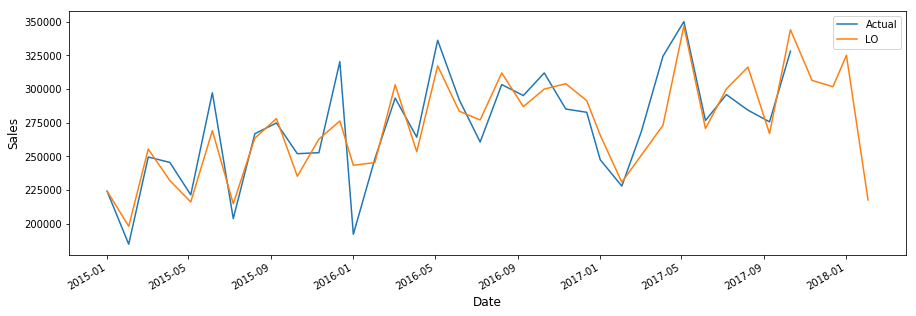

In [91]:
#Actual and LO evolution
m = monthly_data.plot(x='Month-Year', y=['Actual', 'LO'], figsize=(15, 5), legend=True)
m.set_xlabel("Date", fontsize=12)
m.set_ylabel("Sales", fontsize=12)
plt.show()

Text(0, 0.5, 'Sales')

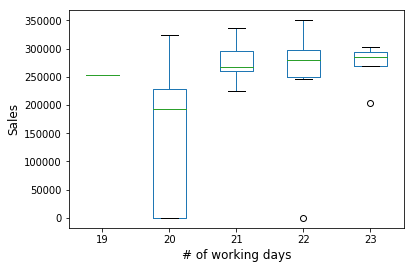

In [96]:
#does the number of working days affect the sales amount?
number_wdays = monthly_data.pivot_table(values='Actual', index='Month-Year', columns='working_days', aggfunc=np.sum)

ax = number_wdays.plot.box()
ax.set_xlabel("# of working days", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)

In [100]:
monthly_data[['working_days', 'LO']].groupby('working_days').count()

,LO
working_days,
19,1
20,9
21,9
22,14
23,5


It doesn't seem to be very obvious

Text(0, 0.5, 'Sales')

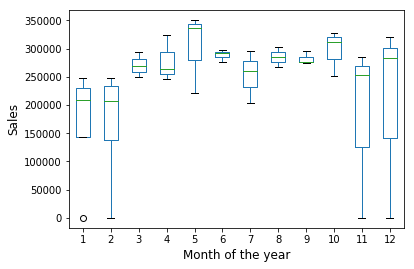

In [102]:
#does the month of the year affect the sales amount?
month_year = monthly_data.pivot_table(values='Actual', index='Month-Year', columns='Month', aggfunc=np.sum)

ax = month_year.plot.box()
ax.set_xlabel("Month of the year", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)

In [104]:
monthly_data[['Month', 'LO']].groupby('Month').count()

,LO
Month,
1,4
2,4
3,3
4,3
5,3
6,3
7,3
8,3
9,3


It seems like the sales are more stable from year to year from march until october. But the sample is not bigh enough to conclude this.

In [93]:
monthly_data.head()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
0,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501,2015,1,224134.6,224175.600000
1,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502,2015,2,184817.6,198122.288255
2,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503,2015,3,249555.0,255465.428000
3,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504,2015,4,245542.0,232068.578168
4,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505,2015,5,221473.8,216181.778528
